# Load and settings

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
import scanpy_scripts as ss

np.set_printoptions(linewidth=180)
sc.settings.verbosity = 1
expr_cmap = ss.lib.expression_colormap()

# Processing

### baron16

In [2]:
raw_ad = sc.read('baron16.h5ad')

In [4]:
raw_ad

AnnData object with n_obs × n_vars = 8569 × 77842 
    obs: 'CellType'
    var: 'gene_ids'

In [5]:
pd.Series(raw_ad.obs_names).str.partition('.')[0].value_counts()

human3_lib3    934
human3_lib4    899
human3_lib1    897
human3_lib2    875
human1_lib3    740
human4_lib3    701
human1_lib2    629
human4_lib1    602
human2_lib2    600
human1_lib1    568
human2_lib3    565
human2_lib1    559
Name: 0, dtype: int64

In [6]:
raw_ad.obs['batch'] = pd.Series(raw_ad.obs_names).str.partition('.')[0].values

In [7]:
ss.lib.calculate_qc(raw_ad)

... storing 'batch' as categorical


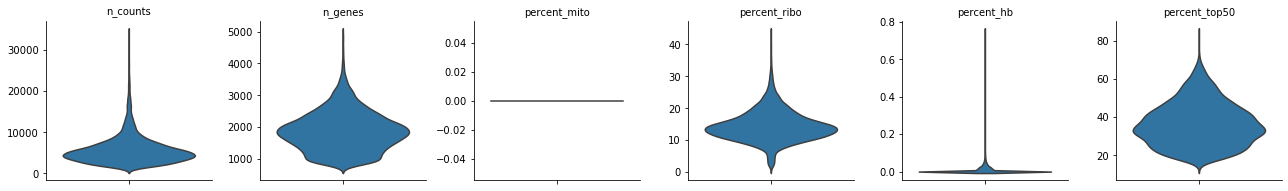

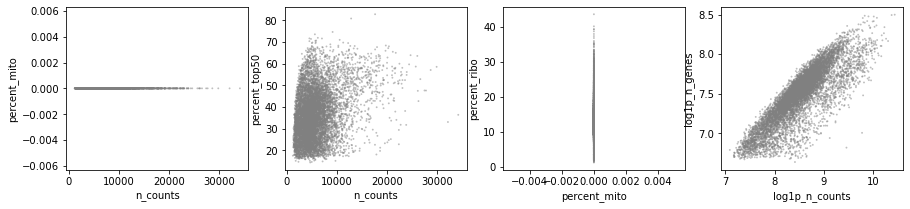

In [8]:
ss.lib.plot_qc(raw_ad)

In [9]:
ad = ss.lib.simple_default_pipeline(raw_ad, batch='batch', filter_kw={'metrics': ['n_counts', 'n_genes', 'percent_ribo', 'percent_top50']})

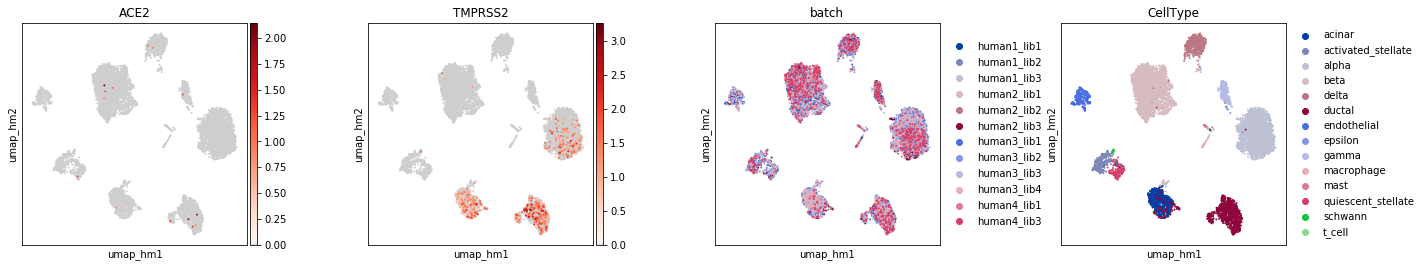

In [10]:
ss.lib.set_figsize((4, 4))
ss.lib.plot_scatter(ad, basis='umap_hm', color=['ACE2', 'TMPRSS2', 'batch', 'CellType'], color_map=expr_cmap, wspace=0.4)

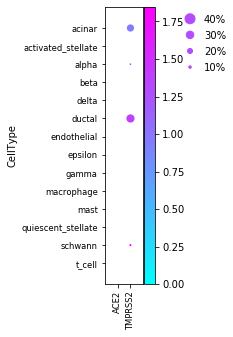

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[0.7, 0, 0.2, 0.5, 0.25])

In [11]:
sc.pl.dotplot(ad, ['ACE2', 'TMPRSS2'], groupby='CellType', color_map='cool', mean_only_expressed=True)